# The Visualization of the Progress of the Philippines' Sustainable Development Goals (SDGs)

# Requirements and Imports
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

## Importing Libraries
Several libraries are required to perform a thorough analysis of the dataset. Each of these libraries will be imported and described below:
* `pandas` contains a large collection of mathematical functions
* `numpy` contains functions that are designed for data manipulation and data analysis
* `geopandas` contains functionalities that make operations easier on spatial database 
* `matplotlib.pyplot` contains functions to create interactive plots
* `shapely.geometry` contain functions that allow the modification and inspection of geometric objections.

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

import plotly.express as px


%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading Datasets and Files


### SDG Data of the Philippines
There are two files that we would need to import through the use of [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for this project. First is the `combined_data.csv`, which holds the information on the progress of the Philippines on the Sustainable Development Goals. Note that this data includes the data per region and for the country (i.e., national data).

In [3]:
url = './data_output/combined_data.csv'
sdg_data = pd.read_csv(url)
sdg_data 

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,579938180.0,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197442590.0,1.070689e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0
410,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,307612801.0,1.095714e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.7
411,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104437875.0,5.642169e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.8
412,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137929548.0,3.767653e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.9


### Geospatial Data of the Philippines (Regional)

Second is the file that holds the geospatial information of the regions of the Philippines.

In [4]:
regional_geo_data = gpd.read_file('gadm_regions.geojson', driver='GeoJSON')
regional_geo_data # CHANGED FILE LOCATION

,region,geometry
0,BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region V,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


## Data Cleaning and Pre-processing
Once we have imported the files that we would need, we would need to the clean and pre-process the dataset so that the two dataset could be combined.

Since we would be combining the two datasets based on the regions, let us first see values of the `ADM1_EN` column in the geospatial data.

In [ ]:
regional_geo_data ['region']

0           BARMM
1             CAR
2             NCR
3        Region I
4       Region II
5      Region III
6     Region IV-A
7     Region IV-B
8       Region IX
9        Region V
10      Region VI
11     Region VII
12    Region VIII
13       Region X
14      Region XI
15     Region XII
16    Region XIII
Name: region, dtype: object

Next, we will also need to look at the values for the region column (i.e., `Geolocation`) in the SDG data.

In [6]:
sdg_data ['Geolocation'].unique ()

array(['PHILIPPINES', 'NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)

From these, we can see that they have different arrangement of the regions, and the region names are formatted differently. Thus, we cannot directly merge the two DataFrames yet. 

### Separating the SDG National and Regional Data
#### National SDG Data
In the values of `Geolocation` for the SDG dataset, we can see that there is the value **PHILIPPINES**, which holds the national data for the SDGs. As this is not part of the geospatial dataset, we would be separating this from the regional data.

In [7]:
ph_sdg_data = sdg_data [sdg_data ['Geolocation'] == 'PHILIPPINES'].reset_index (drop = True)
ph_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,5.799382e+08,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,7.624295e+08,4.024399e+09,78273584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,8.900870e+08,4.350560e+09,79832103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,9.213284e+08,4.717809e+09,81398610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,1.103699e+09,5.323904e+09,82977428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,1.098634e+09,5.917282e+09,84559930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,1.049071e+09,6.550417e+09,86150420.0,6.37,5.00,7.64,8.5,6.7,10.4,NaN
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,1.160980e+09,7.198245e+09,87748896.0,5.99,4.72,7.17,7.5,5.6,9.3,NaN
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,1.526893e+09,8.050201e+09,89359772.0,6.02,4.87,7.07,7.4,5.8,9.1,NaN
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,1.462595e+09,8.390421e+09,90974244.0,6.28,4.93,7.52,8.0,6.2,9.7,NaN


#### Regional SDG Data
Now, we can get the SDG data for the regions of the Philippines.

In [8]:
regional_sdg_data = sdg_data [sdg_data ['Geolocation'] != 'PHILIPPINES'].reset_index (drop = True)
regional_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8037710.0,3.687868e+08,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197442590.0,1.070689e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,307612801.0,1.095714e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.7
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104437875.0,5.642169e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.8
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137929548.0,3.767653e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.9


To check if the national data for the SDGs were not included in the regional data, let us check the unique values for the `Geolocation` column of the regional dataframe by using the `unique()`.

In [9]:
regional_sdg_data ['Geolocation'].unique ()

array(['NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)

From this, we are now sure that we only have the regional data.

### Fixing the Regional DataFrame for the GeoSpatial Data

Now that we have separated the regional and national data, we can now focus on the merging of the SDG and the Geospatial datasets. From the previous exploration, we know that the regions are named and arranged differently. 

To easily merge the datasets, let us rearrange the regions on the geospatial dataset to have the same arrangement and format as the regions on the regional SDG dataset.

In [10]:
regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
    regional_geo_data.loc [1]
).append (
    regional_geo_data.loc [3 : 7]
).append (
    regional_geo_data.loc [9 : 12]
).append (
    regional_geo_data.loc [8]
).append(
    regional_geo_data.loc [13 : ]
).append(
    regional_geo_data.loc [0]
).reset_index (drop = True)

regional_geo_data

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/3488050636.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame (regional_geo_data.loc [2 : 2]).append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/3488050636.py:1: FutureWarning: The frame.append method is dep

,region,geometry
0,NCR,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region I,"(POLYGON ((119.86672200000032 15.81368, 119.86..."
3,Region II,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region III,(POLYGON ((120.08513600100014 14.7522300000001...
5,Region IV-A,(POLYGON ((121.09694671600005 13.5386104600000...
6,Region IV-B,(POLYGON ((117.31028000100002 7.50721999900008...
7,Region V,(POLYGON ((122.98555800100007 11.7136100010001...
8,Region VI,(POLYGON ((122.3672640010002 9.827860001000033...
9,Region VII,(POLYGON ((123.2749481200002 9.078849793000188...


With this, the geospatial dataset's regions has the same arrangement as the regional SDG data. 

Although, before combining the datasets, we will need to drop the columns that are all **NaN** values first using the [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [11]:
regional_geo_data = regional_geo_data.dropna (axis = 1)
regional_geo_data

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,region,geometry
0,NCR,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region I,"(POLYGON ((119.86672200000032 15.81368, 119.86..."
3,Region II,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region III,(POLYGON ((120.08513600100014 14.7522300000001...
5,Region IV-A,(POLYGON ((121.09694671600005 13.5386104600000...
6,Region IV-B,(POLYGON ((117.31028000100002 7.50721999900008...
7,Region V,(POLYGON ((122.98555800100007 11.7136100010001...
8,Region VI,(POLYGON ((122.3672640010002 9.827860001000033...
9,Region VII,(POLYGON ((123.2749481200002 9.078849793000188...


Last, since we know that the regional SDG dataset is arranged per year then per regions (i.e., data for the same year are found one after the other) and that this dataset includes data from 2000 to 2022, we would need to repeat the geospatial dataset **22 times**.

In [12]:
final_regional_geo_data = pd.DataFrame ()

for i in range (23):
    final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
    
final_regional_geo_data = final_regional_geo_data.reset_index (drop = True)
final_regional_geo_data

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/1682449140.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/1682449140.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/1682449140.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/1682449140.py:4: FutureWarning: The frame.append meth

,region,geometry
0,NCR,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region I,"(POLYGON ((119.86672200000032 15.81368, 119.86..."
3,Region II,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region III,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...
386,Region X,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region XI,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region XII,POLYGON ((125.32145690800019 5.569099903999984...
389,Region XIII,(POLYGON ((125.23621368400029 8.78464985000016...


Now, we can combine the two datasets using the [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function.

In [13]:
combined_df = pd.concat ([regional_sdg_data, final_regional_geo_data], axis = 1)
combined_df

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,region,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAR,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region I,"(POLYGON ((119.86672200000032 15.81368, 119.86..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region II,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region III,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,Region X,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.7,Region XI,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.8,Region XII,POLYGON ((125.32145690800019 5.569099903999984...
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.9,Region XIII,(POLYGON ((125.23621368400029 8.78464985000016...


To ensure that we combined the datasets correctly based on the region, we will be looking at the `Geolocation` and the `ADM1ALT1EN` columns, which are the columns from the two datasets that holds the region names.

In [14]:
combined_df [['Geolocation', 'region']].head(20)

,Geolocation,region
0,NCR: National Capital Region,NCR
1,CAR: Cordillera Administrative Region,CAR
2,Region 1: Ilocos Region,Region I
3,Region 2: Cagayan Valley,Region II
4,Region 3: Central Luzon,Region III
5,Region 4A: CALABARZON,Region IV-A
6,MIMAROPA: Southwestern Tagalog Region,Region IV-B
7,Region 5: Bicol Region,Region V
8,Region 6: Western Visayas,Region VI
9,Region 7: Central Visayas,Region VII


#### NOT UPDATED 
We can see that the region names for the two columns refer to the same region. Since these two columns holds the same data, we can remove the `ADM1ALT1EN` column, and the other columns that holds data regarding the region name (i.e., `ADM1_EN`, `ADM1_PCODE`).

In [16]:
final_columns = combined_df.columns [: 55].append (combined_df.columns [58: ])
final_columns

Index(['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion

Now, we will only get these columns in the combined DataFrame.

In [17]:
combined_df = combined_df[final_columns]
combined_df

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,region,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAR,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region I,"(POLYGON ((119.86672200000032 15.81368, 119.86..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region II,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region III,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,Region X,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.7,Region XI,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.8,Region XII,POLYGON ((125.32145690800019 5.569099903999984...
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.9,Region XIII,(POLYGON ((125.23621368400029 8.78464985000016...


### Converting the Pandas DataFrame to GeoPandas DataFrame

Lastly, we would be making a `GeoDataFrame` using the Pandas DataFrame that we have created.

In [18]:
gdf = gpd.GeoDataFrame(combined_df, geometry = combined_df ['geometry'])

gdf

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,region,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,Region X,"MULTIPOLYGON (((123.77850 8.06635, 123.77773 8..."
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.7,Region XI,"MULTIPOLYGON (((125.41264 5.36709, 125.41250 5..."
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.8,Region XII,"POLYGON ((125.32146 5.56910, 125.32104 5.56910..."
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.9,Region XIII,"MULTIPOLYGON (((125.23621 8.78465, 125.24001 8..."


In [19]:
gdf[gdf['Year'] < 2011]

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture,region,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,8233671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Region 10: Northern Mindanao,2010,NaN,92.74,93.97,91.57,55.24,61.00,49.75,NaN,...,4309258.0,7.95,6.23,9.53,6.0,4.5,7.5,NaN,Region X,"MULTIPOLYGON (((123.77850 8.06635, 123.77773 8..."
183,Region 11: Davao Region,2010,NaN,99.37,99.56,99.18,55.87,61.68,50.30,NaN,...,4481458.0,8.80,6.77,10.63,9.2,6.6,11.9,NaN,Region XI,"MULTIPOLYGON (((125.41264 5.36709, 125.41250 5..."
184,Region 12: SOCCSKSARGEN,2010,NaN,88.65,90.58,86.84,54.15,59.76,48.77,NaN,...,3701963.0,8.90,7.43,10.28,8.7,7.4,10.1,NaN,Region XII,"POLYGON ((125.32146 5.56910, 125.32104 5.56910..."
185,CARAGA: CARAGA Administrative Region,2010,NaN,96.95,97.34,96.58,58.18,63.67,53.03,NaN,...,2434366.0,6.72,5.04,8.22,9.3,7.9,10.7,NaN,Region XIII,"MULTIPOLYGON (((125.23621 8.78465, 125.24001 8..."


# Visualizing Geospatial Data

In [20]:
#ph_regional_gdf = gpd.read_file('./phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm1_psa_namria_20200529.shp')
#ph_regional_gdf

KeyboardInterrupt: 

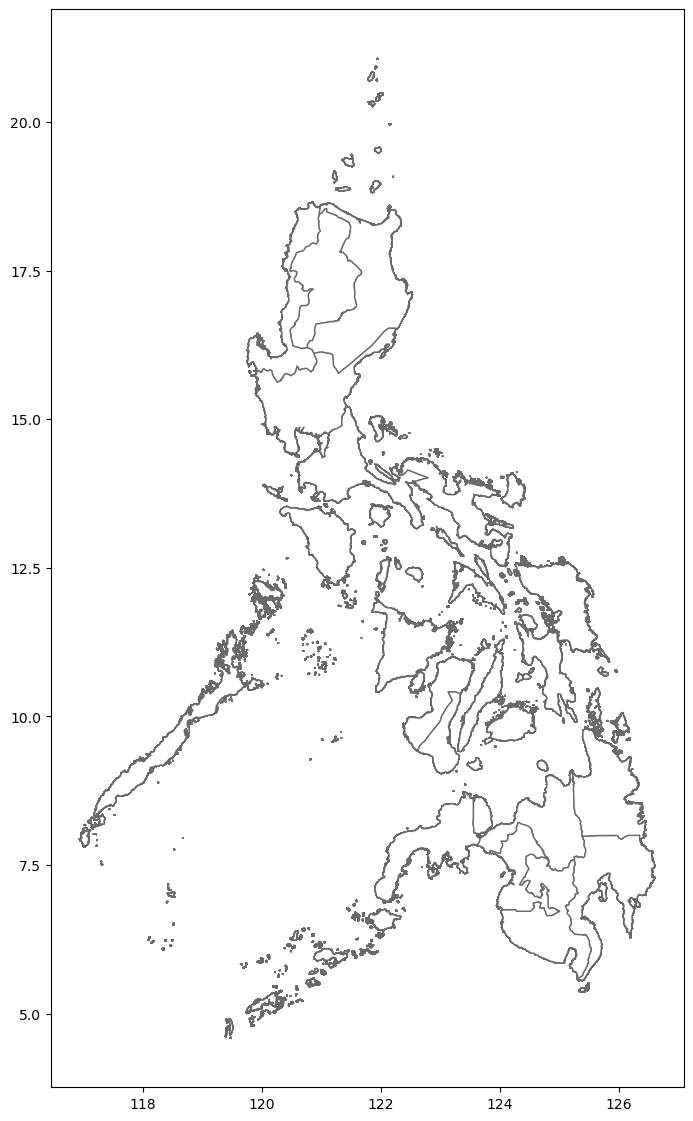

In [21]:
ax = gdf.plot(figsize=(20, 14), color='white', edgecolor='dimgray')

In [22]:
murder2021 = combined_df[combined_df['Year'] == 2021][['Geolocation','16.1.s1 Number of murder cases', 'geometry']]
murder2021 = murder2021.reset_index (drop = True)
murder2021 = gpd.GeoDataFrame(murder2021, geometry = murder2021 ['geometry'])

(116.44448661890016,
 127.08919715910014,
 3.7627799500001475,
 21.894301049999992)

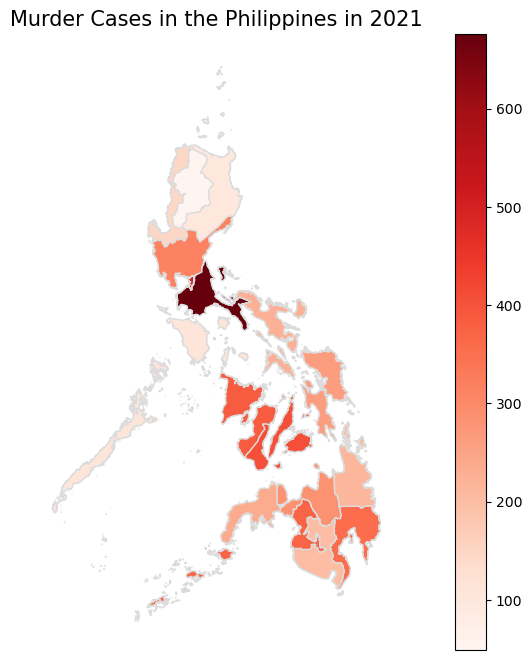

In [23]:
ax = murder2021.plot(figsize = (15, 8), 
                     column = '16.1.s1 Number of murder cases', 
                     cmap = plt.cm.Reds, 
                     legend = True, 
                     edgecolor = 'gainsboro')

ax.set_title('Murder Cases in the Philippines in 2021', fontsize = 15)
ax.axis(False)

In [24]:
b_enrolment2018 = combined_df[combined_df['Year'] == 2018][['Geolocation','1.4.1 Net Elem Enrolment Rate (Boys)', 'geometry']]
b_enrolment2018 = b_enrolment2018.reset_index (drop = True)
b_enrolment2018 = gpd.GeoDataFrame(b_enrolment2018, geometry = b_enrolment2018 ['geometry'])

(116.44448661890016,
 127.08919715910014,
 3.7627799500001475,
 21.894301049999992)

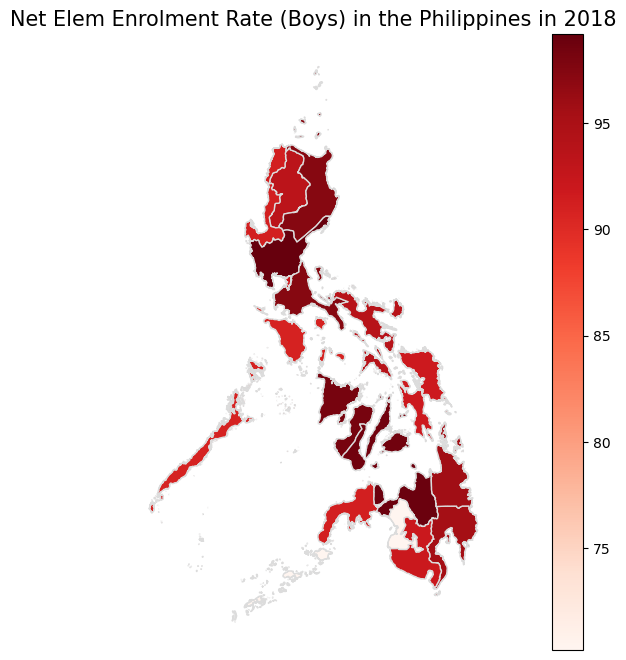

In [25]:
ax = b_enrolment2018.plot(figsize = (15, 8), 
                     column = '1.4.1 Net Elem Enrolment Rate (Boys)', 
                     cmap = plt.cm.Reds, 
                     legend = True, 
                     edgecolor = 'gainsboro')

ax.set_title('Net Elem Enrolment Rate (Boys) in the Philippines in 2018', fontsize = 15)
ax.axis(False)

### Save the merged dataset for a single loading in the Plotly Dash application

`geopandas` provides a way to save any changes you've made to the `GeoDataFrame`. You may save it as a Shapefile or a GeoJSON.

In [26]:
gdf.shape

(391, 55)

In [27]:
gdf1=gdf[gdf['Year'] <= 2011]
gdf1.shape

(204, 55)

In [28]:
gdf2=gdf[gdf['Year'] > 2011]
gdf2.shape

(187, 55)

In [32]:
# shapefile
gdf.to_file('./data_output/sdg_regional_data.shp')

# geojson
gdf.to_file('./data_output/sdg_regional_data.geojson', driver='GeoJSON')

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_20912/1461373517.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./data_output/sdg_regional_data.shp')
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


#### By Region

In [29]:
gdf.Geolocation.unique()

array(['NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)